In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Pc\Desktop\ML TPs\tp3v2\HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


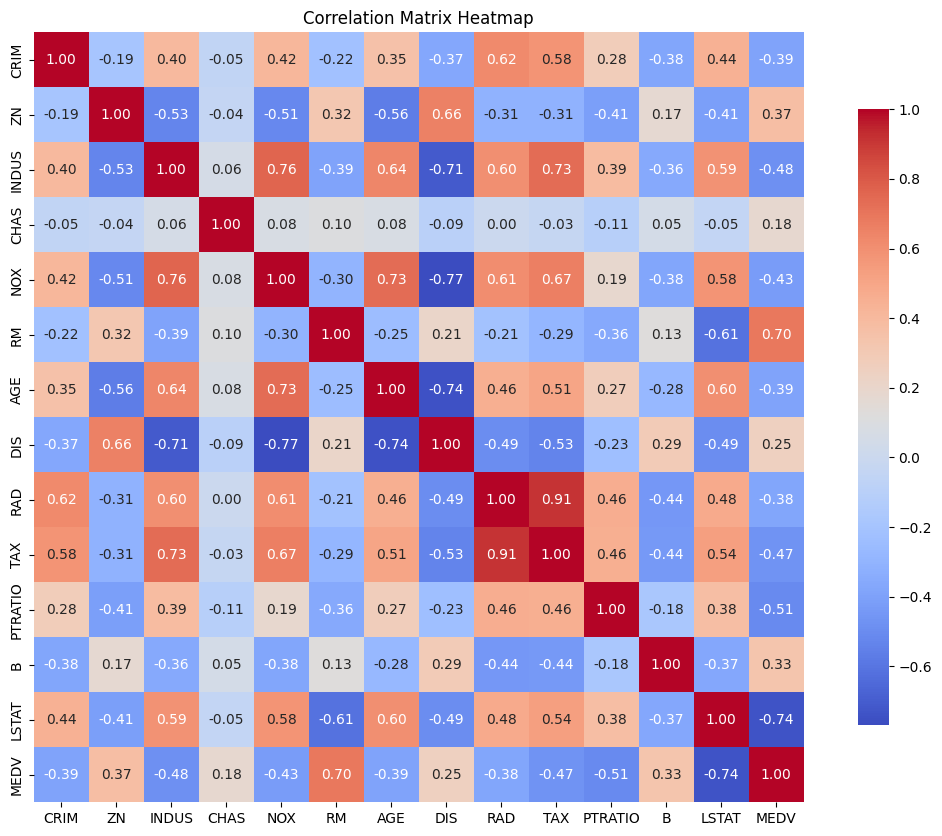

In [3]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()



In [4]:
threshold = 0.6
highly_correlated_features = correlation_matrix[abs(correlation_matrix['MEDV']) > threshold].index.tolist()
print("Highly Correlated Features with MEDV:\n", highly_correlated_features)

Highly Correlated Features with MEDV:
 ['RM', 'LSTAT', 'MEDV']


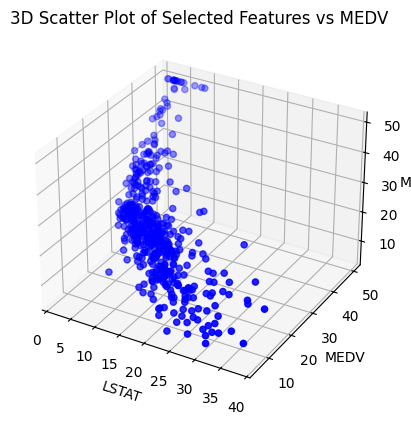

In [5]:
if len(highly_correlated_features) >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    # Choose the first three features for 3D plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(df[highly_correlated_features[1]], df[highly_correlated_features[2]], df['MEDV'], c='b', marker='o')
    
    ax.set_xlabel(highly_correlated_features[1])
    ax.set_ylabel(highly_correlated_features[2])
    ax.set_zlabel('MEDV')
    ax.set_title('3D Scatter Plot of Selected Features vs MEDV')
    plt.show()
else:
    print("Not enough highly correlated features for 3D plotting.")

In [6]:
# Split the dataset into features and label
X = df[highly_correlated_features].drop(columns=['MEDV'])
y = df['MEDV']


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


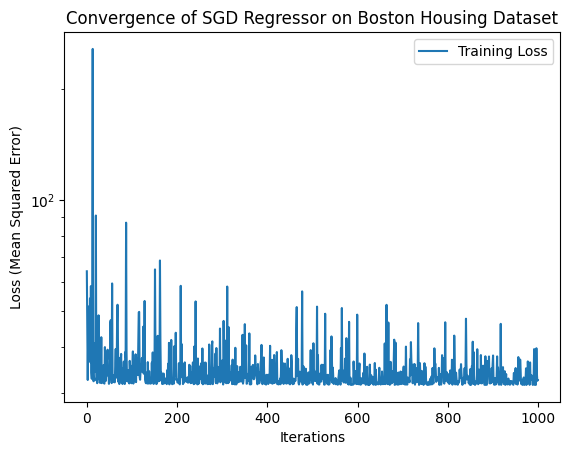

In [18]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1, warm_start=True, tol=1e-3)
losses = []
n = 1000  
for i in range(n):
    sgdr.partial_fit(X_train, y_train)  
    y_pred = sgdr.predict(X_train)  
    loss = mean_squared_error(y_train, y_pred)  
    losses.append(loss) 
plt.plot(range(n), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Convergence of SGD Regressor on Boston Housing Dataset")
plt.legend()
plt.yscale('log') 
plt.show()

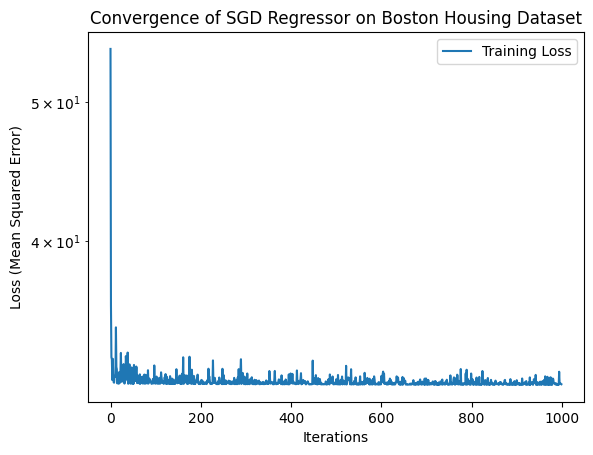

In [19]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.001, max_iter=1, warm_start=True, tol=1e-3)
losses = []
n = 1000  
for i in range(n):
    sgdr.partial_fit(X_train, y_train)  
    y_pred = sgdr.predict(X_train)  
    loss = mean_squared_error(y_train, y_pred)  
    losses.append(loss) 
plt.plot(range(n), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Convergence of SGD Regressor on Boston Housing Dataset")
plt.legend()
plt.yscale('log') 
plt.show()


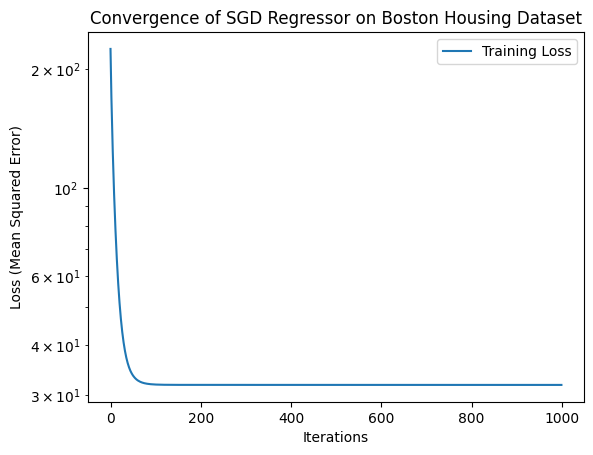

In [20]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001, max_iter=1, warm_start=True, tol=1e-3)
losses = []
n = 1000  
for i in range(n):
    sgdr.partial_fit(X_train, y_train)  
    y_pred = sgdr.predict(X_train)  
    loss = mean_squared_error(y_train, y_pred)  
    losses.append(loss) 
plt.plot(range(n), losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Convergence of SGD Regressor on Boston Housing Dataset")
plt.legend()
plt.yscale('log') 
plt.show()


In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Display the metrics
print("Performance Metrics for SGDRegressor:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")


NameError: name 'y_test' is not defined

NameError: name 'models' is not defined